In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
Data = pd.read_csv("D:\Shopping Trends Project\shopping_trends.csv")

In [3]:
Data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
Data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
Data.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [7]:
Data['Age'].value_counts()


69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

In [8]:
def categorize_age(age):
    if 18 <= age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Mid-age'
    elif 50 <= age < 70:
        return 'Old'

In [9]:
Data['Age_category'] = Data['Age'].apply(categorize_age)


<Axes: xlabel='Age_category', ylabel='count'>

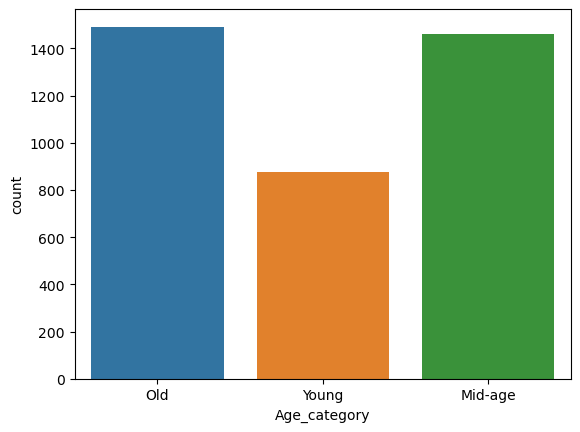

In [10]:
sns.countplot(data=Data,x='Age_category')


Text(0.5, 1.0, 'Between males and females, who buys more?')

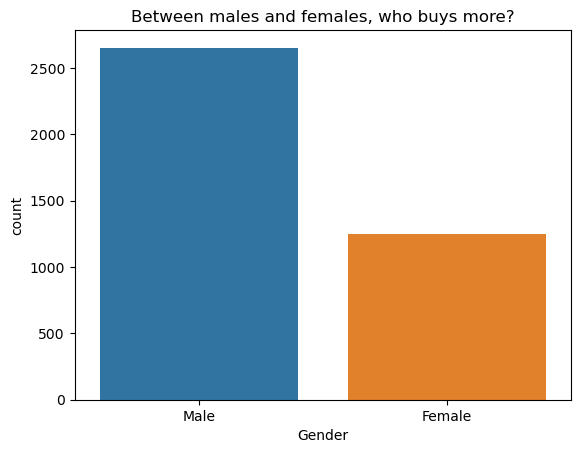

In [11]:
sns.countplot(x="Gender",data=Data)
plt.title("Between males and females, who buys more?")

In [12]:
Data.groupby('Category')['Item Purchased'].value_counts()


Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: Item Purchased, dtype: int64

In [13]:
amount= Data.groupby('Gender')['Purchase Amount (USD)'].sum()
amount

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

In [14]:
payment_methods = Data['Payment Method'].unique()
count_method= Data['Payment Method'].value_counts().reset_index()
count_method

,index,Payment Method
0,Credit Card,696
1,Venmo,653
2,Cash,648
3,PayPal,638
4,Debit Card,633
5,Bank Transfer,632


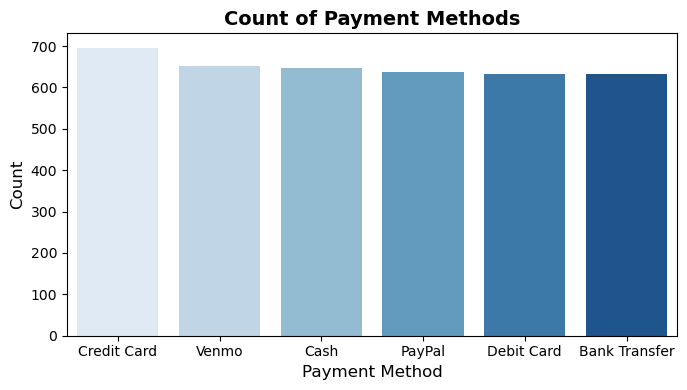

In [15]:
plt.figure(figsize=(7,4))
sns.barplot(x='index', y='Payment Method', data=count_method, palette='Blues')

plt.title('Count of Payment Methods', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
Data.groupby('Season')['Item Purchased'].value_counts().sort_values(ascending=False)[:8]


Season  Item Purchased
Fall    Jacket            54
Spring  Sweater           52
Winter  Sunglasses        52
        Pants             51
        Shirt             50
Fall    Hat               50
Summer  Pants             50
Winter  Hoodie            48
Name: Item Purchased, dtype: int64

In [17]:
Data.groupby('Category')['Review Rating'].mean()


Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [18]:
ax=pd.crosstab(Data["Discount Applied"],Data["Category"])
ax.sort_values(by="Discount Applied",ascending=False)

Category,Accessories,Clothing,Footwear,Outerwear
Discount Applied,,,,
Yes,543,731,259,144
No,697,1006,340,180


In [19]:
pd.crosstab(Data['Season'],Data['Category'],values=Data['Purchase Amount (USD)'],aggfunc=np.sum)

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,19874,26220,8665,5259
Spring,17007,27692,9555,4425
Summer,19028,23078,9393,4278
Winter,18291,27274,8480,4562


In [20]:
Data['Subscription Status'].value_counts()


No     2847
Yes    1053
Name: Subscription Status, dtype: int64

In [21]:
Data.groupby('Subscription Status')['Purchase Amount (USD)'].sum()


Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64

<Axes: xlabel='Category', ylabel='count'>

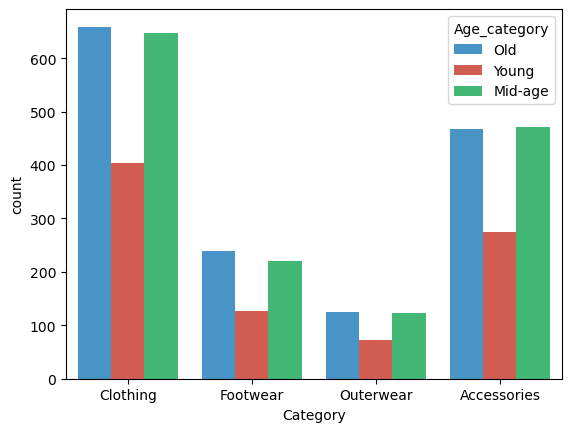

In [22]:
sns.countplot(data=Data, x='Category', hue='Age_category', palette=['#3498db', '#e74c3c', '#2ecc71'])


Text(0.5, 1.0, 'how many are getting discount')

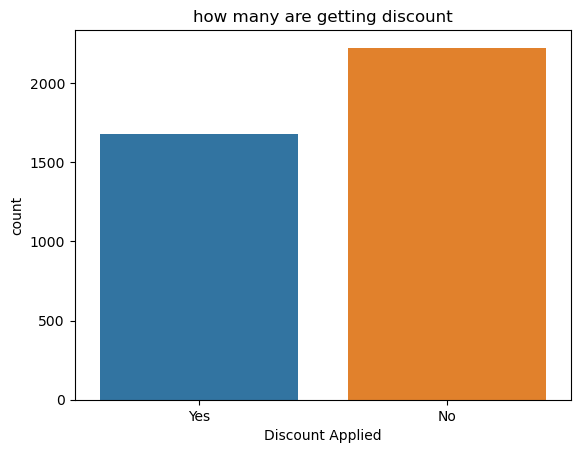

In [23]:
sns.countplot(x="Discount Applied",data=Data)
plt.title("how many are getting discount")

In [24]:
Shipping_Type = Data['Shipping Type'].value_counts()
Shipping_Type

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

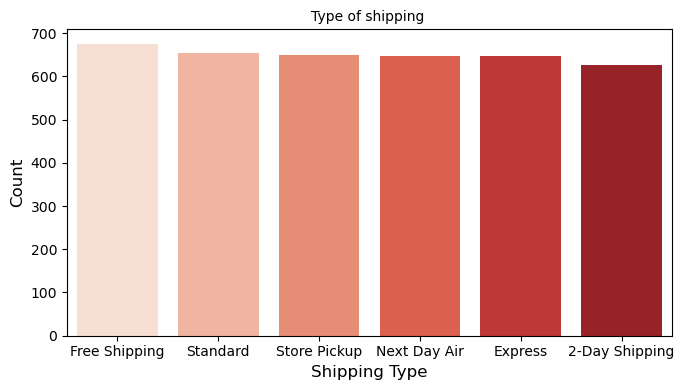

In [25]:
plt.figure(figsize=(7, 4))
sns.barplot(x=Shipping_Type.index, y=Shipping_Type, palette='Reds', linewidth=2)
plt.title('Type of shipping ', loc='center', fontsize=10)
plt.xlabel('Shipping Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


In [26]:
Frequency_of_Purchases =Data['Frequency of Purchases'].value_counts()
print(Frequency_of_Purchases)

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64


In [27]:
Data.groupby('Promo Code Used')['Purchase Amount (USD)'].count()


Promo Code Used
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64

Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: Location, dtype: int64


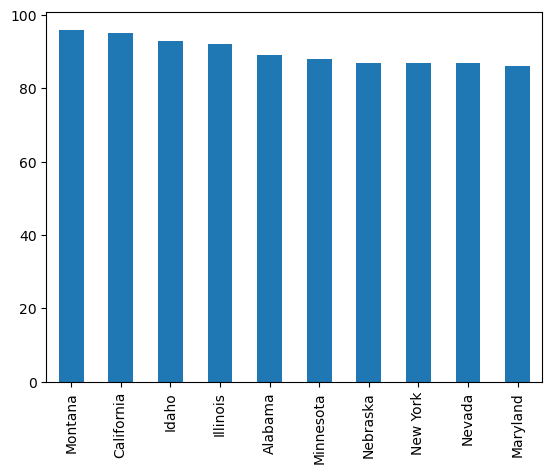

In [28]:
Data['Location'].value_counts()[:10].plot(kind='bar')
print(Data['Location'].value_counts()[:10])

<Axes: >

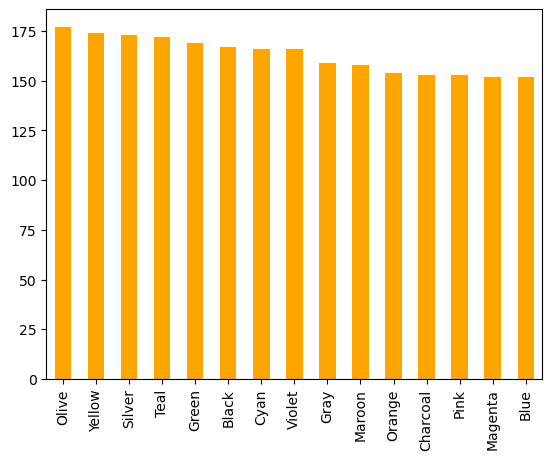

In [29]:
Data['Color'].value_counts()[:15].plot(kind='bar', color='orange')


In [30]:
pd.crosstab(Data['Season'],Data['Item Purchased']).T


Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


In [31]:
size_count = Data['Size'].value_counts()
size_count

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

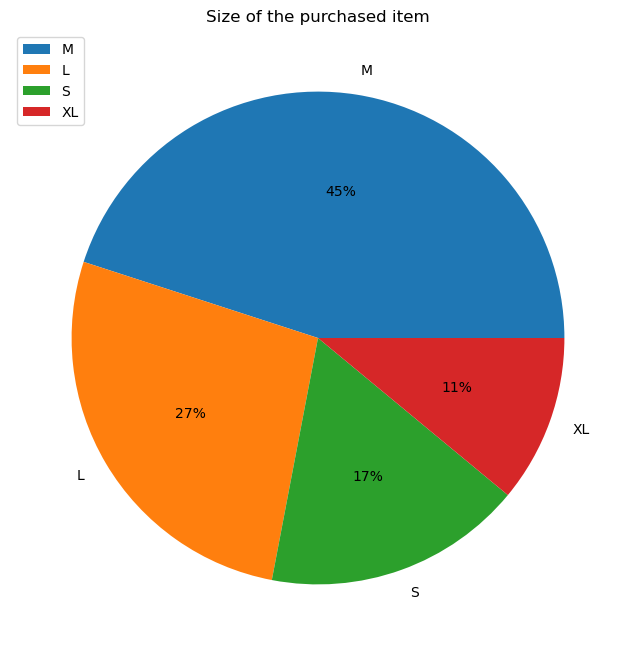

In [32]:
plt.figure(figsize=(8,8))
plt.pie(size_count,labels=['M','L','S','XL'],autopct='%0.f%%',explode=(0,0,0,0))
plt.legend( ['M','L','S','XL'],loc =2)
plt.title('Size of the purchased item')
plt.show()

In [33]:
Data[Data['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()


Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64